In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(56)

## Generating Data

In [4]:
n=100
data = {
    'Student_ID': np.arange(1, n+1),
    'Math_Score': np.random.normal(70, 10, n).astype(int),
    'Science_Score': np.random.normal(75, 12, n).astype(int),
    'English_Score': np.random.normal(65, 8, n).astype(int),
    'Attendance': np.random.uniform(70, 100, n).astype(int)
}

In [5]:
df = pd.DataFrame(data)
df

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
0,1,75,75,65,76
1,2,77,48,72,99
2,3,62,100,69,81
3,4,72,77,56,87
4,5,64,63,55,98
...,...,...,...,...,...
95,96,71,68,66,84
96,97,77,67,54,90
97,98,71,64,65,80
98,99,80,70,68,75


## Introduce missing values


In [6]:
missing_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[missing_indices, 'Math_Score'] = np.nan

df.loc[np.random.choice(df.index, size=5, replace=False), 'Science_Score'] = np.nan

df.loc[np.random.choice(df.index, size=3, replace=False), 'English_Score'] = np.nan

## Introducting Outliers

In [7]:
df.loc[np.random.choice(df.index, size=3, replace=False), 'Math_Score'] = [650, -53, 1600]
df.loc[np.random.choice(df.index,size=3,replace=False),"Science_Score"]=[1600,-452,3140]
df.loc[np.random.choice(df.index,size=3,replace=False),"English_Score"]=[-130,777,144]

In [8]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
0,1,75.0,75.0,65.0,76
1,2,77.0,48.0,72.0,99
2,3,62.0,100.0,69.0,81
3,4,72.0,77.0,56.0,87
4,5,64.0,63.0,55.0,98
...,...,...,...,...,...
95,96,71.0,68.0,66.0,84
96,97,77.0,67.0,54.0,90
97,98,71.0,64.0,65.0,80
98,99,80.0,70.0,68.0,75


In [9]:
df.isnull().sum()

Student_ID       0
Math_Score       5
Science_Score    5
English_Score    3
Attendance       0
dtype: int64

In [9]:
df["Math_Score"]=df['Math_Score'].fillna(df['Math_Score'].median())
df["Science_Score"]=df["Science_Score"].fillna(df["Science_Score"].median())
df["English_Score"]=df["English_Score"].fillna(df["English_Score"].median())

In [10]:
df.isnull().sum()

,0
Student_ID,0
Math_Score,0
Science_Score,0
English_Score,0
Attendance,0


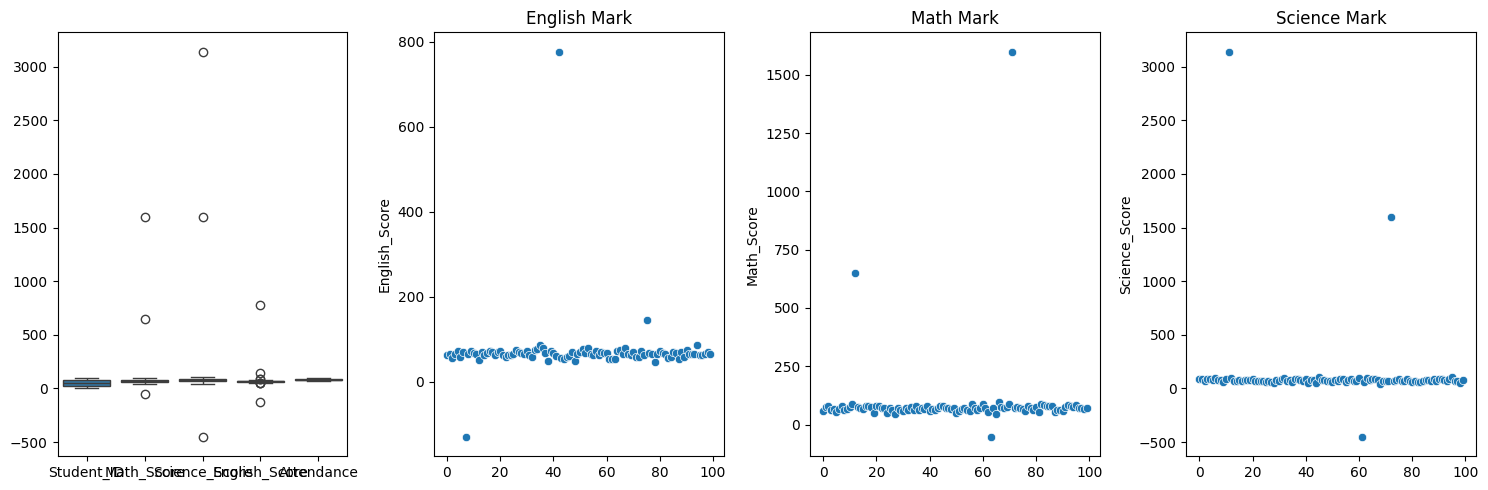

In [11]:
fig,ax=plt.subplots(1,4,figsize=(15,5))
sns.boxplot(df,ax=ax[0])
sns.scatterplot(df['English_Score'],  ax=ax[1]).set_title('English Mark')
sns.scatterplot(df['Math_Score'],  ax=ax[2]).set_title('Math Mark')
sns.scatterplot(df['Science_Score'],  ax=ax[3]).set_title('Science Mark')
plt.tight_layout()
plt.show()



## Removing Outliers

In [12]:
df.describe()

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,89.840000,115.310000,71.460000,82.910000
std,29.011492,164.018336,345.955147,74.721222,8.366715
min,1.000000,-53.000000,-452.000000,-130.000000,70.000000
25%,25.750000,63.750000,67.000000,62.000000,75.750000
50%,50.500000,71.000000,74.000000,66.000000,82.500000
75%,75.250000,78.000000,85.000000,70.000000,89.000000
max,100.000000,1600.000000,3140.000000,777.000000,99.000000


In [13]:
cols = ['Math_Score', 'English_Score', 'Science_Score']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


print(df.shape)





Math_Score - Lower Bound: 42.375, Upper Bound: 99.375
English_Score - Lower Bound: 50.0, Upper Bound: 82.0
Science_Score - Lower Bound: 40.0, Upper Bound: 112.0
(86, 5)


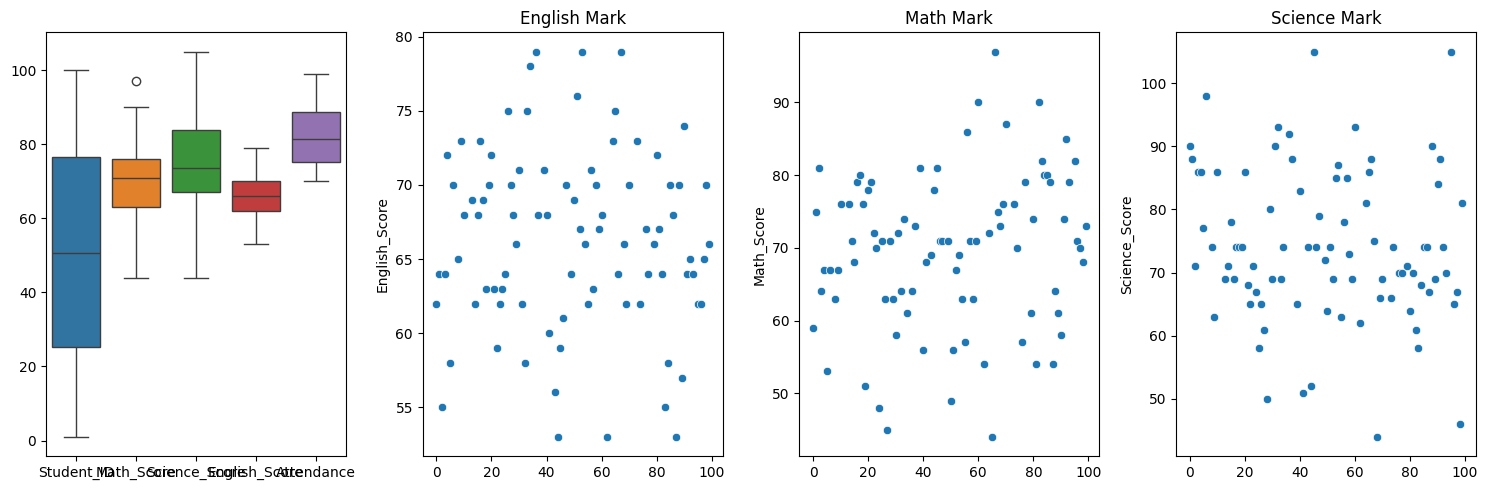

In [14]:
fig,ax=plt.subplots(1,4,figsize=(15,5))
sns.boxplot(df,ax=ax[0])
sns.scatterplot(df['English_Score'],ax=ax[1]).set_title('English Mark')
sns.scatterplot(df['Math_Score'],ax=ax[2]).set_title('Math Mark')
sns.scatterplot(df['Science_Score'],ax=ax[3]).set_title('Science Mark')
plt.tight_layout()
plt.show()

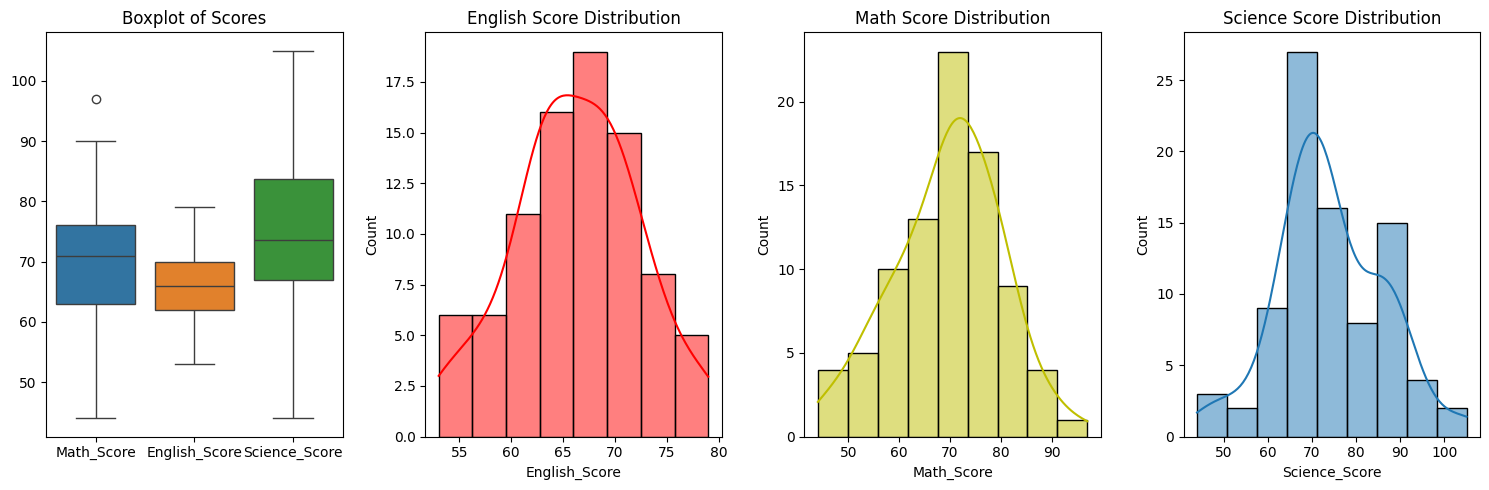

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

sns.boxplot(data=df[['Math_Score', 'English_Score', 'Science_Score']], ax=ax[0])
ax[0].set_title('Boxplot of Scores')

sns.histplot(df['English_Score'], kde=True, ax=ax[1],color='r')
ax[1].set_title('English Score Distribution')

sns.histplot(df['Math_Score'], kde=True, ax=ax[2],color='y')
ax[2].set_title('Math Score Distribution')

sns.histplot(df['Science_Score'], kde=True, ax=ax[3])
ax[3].set_title('Science Score Distribution')

plt.tight_layout()
plt.show()


In [17]:
print(df[['Math_Score', 'English_Score', 'Science_Score']].skew())


Math_Score      -0.207735
English_Score   -0.085036
Science_Score    0.141484
dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Math_Score_Standardized', 'English_Score_Standardized', 'Science_Score_Standardized']] = scaler.fit_transform(df[['Math_Score', 'English_Score', 'Science_Score']])


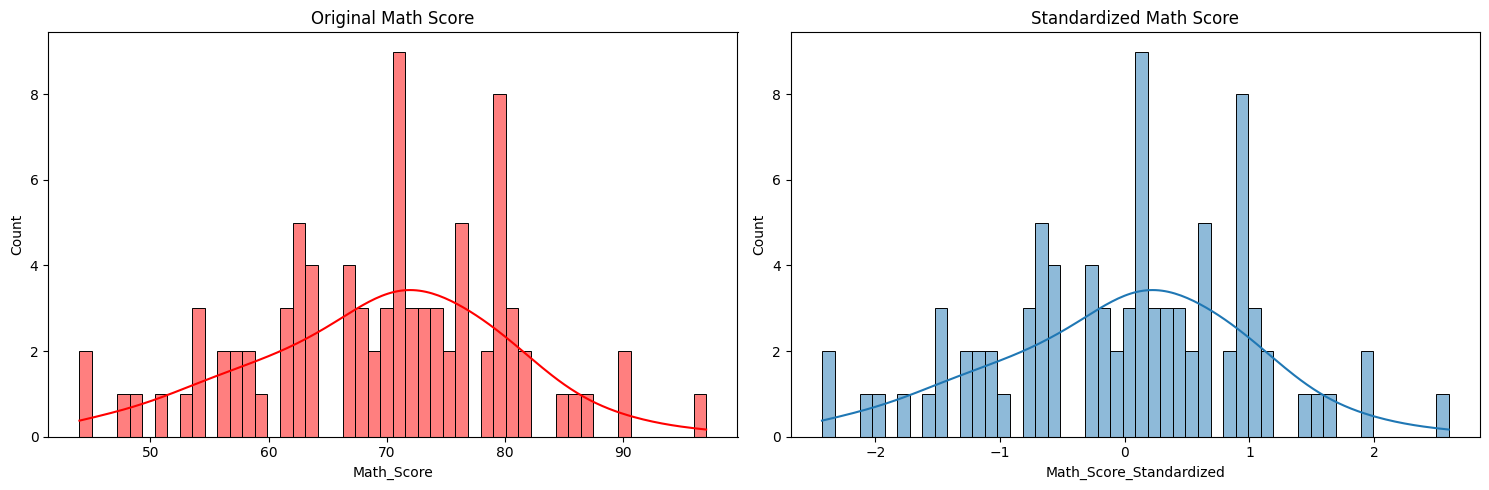

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df['Math_Score'], bins=50, kde=True, ax=axes[0],color='red').set_title('Original Math Score')
sns.histplot(df['Math_Score_Standardized'], bins=50, kde=True, ax=axes[1]).set_title('Standardized Math Score')


plt.tight_layout()

plt.show()